In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('test.csv', sep = ',')

In [3]:
data.shape

(418, 11)

In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 418


In [5]:
# типы колонок
data.dtypes

In [6]:
# Первые 5 строк датасета
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
data.isnull().sum()

**1. Обработка пропусков в данных**

**Вариант 1. Заполнение нулями или удаление**

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((418, 11), (418, 8))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((418, 11), (87, 11))

In [10]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


**Вариант 2. "Внедрение значений" - импьютация (imputation)**

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 86, 20.57%.
Колонка Fare. Тип данных float64. Количество пустых значений 1, 0.24%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875
...,...,...
413,NaN,8.0500
414,39.0,108.9000
415,38.5,7.2500
416,NaN,8.0500


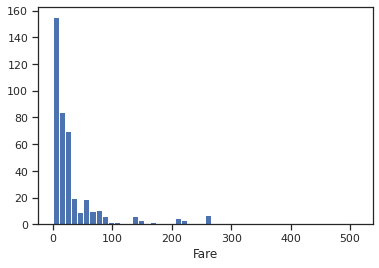

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
# Фильтр по пустым значениям поля Fare
data[data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [16]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Fare'].isnull()].index
flt_index

Int64Index([152], dtype='int64')

In [17]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Age'].isnull()].index
flt_index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [18]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Fare']

In [19]:
#Будем использовать встроенные средства импьютации библиотеки scikit-learn
data_num_Fare = data_num[['Fare']]
data_num_Fare.head()

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [21]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Fare)
mask_missing_values_only

In [22]:
strategies=['mean', 'median', 'most_frequent'] 
#каким значением будем заполнять. Age - Медиана так как много выбросов
#Fare - среднее значение 

In [23]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Fare)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])

('mean', array([35.62718849]))

In [25]:
strategies[1], test_num_impute(strategies[1])

('median', array([14.4542]))

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([7.75]))

In [27]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [28]:
data[['Age']].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


In [29]:
test_num_impute_col(data, 'Age', strategies[0])

('Age', 'mean', 86, 30.272590361445783, 30.272590361445783)

In [30]:

test_num_impute_col(data, 'Age', strategies[1])

('Age', 'median', 86, 27.0, 27.0)

In [31]:

test_num_impute_col(data, 'Age', strategies[2])

('Age', 'most_frequent', 86, 21.0, 21.0)

**Обработка пропусков категориальных значений** 

In [32]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Cabin. Тип данных object. Количество пустых значений 327, 78.23%.


In [33]:
cat_temp_data = data[['Cabin']]
cat_temp_data.head()

,Cabin
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [34]:
cat_temp_data['Cabin'].unique()

In [35]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

In [36]:
# Пустые значения отсутствуют
np.unique(data_imp2)

In [37]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

In [38]:
np.unique(data_imp3)

In [39]:
data_imp3[data_imp3=='NA'].size

327

**Преобразование категориальных признаков в числовые**

In [40]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,B57 B59 B63 B66
1,B57 B59 B63 B66
2,B57 B59 B63 B66
3,B57 B59 B63 B66
4,B57 B59 B63 B66
...,...
413,B57 B59 B63 B66
414,C105
415,B57 B59 B63 B66
416,B57 B59 B63 B66


In [58]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LanelEncoder создает фиктивный порядок. Если категориалные признаки изначально создают какой-то порядок, это хорошо. Если набор данных не имеет порядка, то получается ненужный порядок. 
"+": Не увеличивает кол-во колонок

In [42]:
cat_enc['c1'].unique()

In [43]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [44]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

In [46]:
np.unique(cat_enc_le)

**Использование OneHotEncoding**
Избавление от фиктивного порядка, как в лейблЭнкодинг. Но одна колонка превратится в кол-во наших строковых значений. В наших данных 76 уникальных значений, значит столько новых колонок и появится.
Плохо работает в корреляцией. В нашем слуйчае лучше использовать label encoding

In [61]:
pd.get_dummies(cat_enc).head()
#Из pandas data frame. Не разряженная матрица. 
#Так вообще делать нельзя в нашем случае

,c1_A11,c1_A18,c1_A21,c1_A29,c1_A34,c1_A9,c1_B10,c1_B11,c1_B24,c1_B26,...,c1_E52,c1_E60,c1_F,c1_F E46,c1_F E57,c1_F G63,c1_F2,c1_F33,c1_F4,c1_G6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [63]:
cat_enc.shape

(418, 1)

In [64]:
cat_enc_ohe.shape

(418, 76)

In [65]:
cat_enc_ohe

<418x76 sparse matrix of type '<class 'numpy.float64'>'
	with 418 stored elements in Compressed Sparse Row format>

In [66]:
cat_enc_ohe.todense()[0:10]

**Масштабирование данных**
Диапазон возможных значений от 0 до 1(MinMax) или от -3 до 3 (Z-масштабирование). Меняем  только диапазон значений
При использовании решающего дерева это не имеет значение (так как работа только с if). В других методах нужно масштабировать данные 

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [69]:
#MinMax масштабирование
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Fare']])

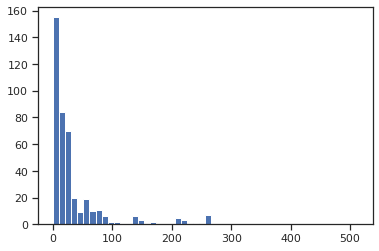

In [70]:
plt.hist(data['Fare'], 50)
plt.show()

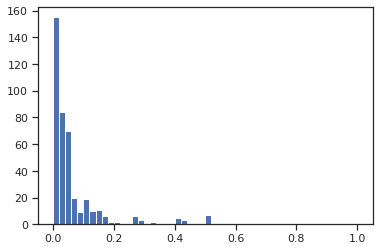

In [71]:
plt.hist(sc1_data, 50)
plt.show()

In [72]:
#Масштабирование данных на основе Z-оценки - StandardScaler
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Fare']])

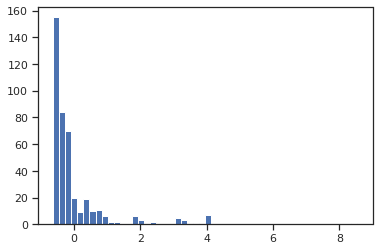

In [73]:
plt.hist(sc2_data, 50)
plt.show()